In [1]:
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import functools
from segment_anything.utils.onnx import SamOnnxModel
from segment_anything.modeling import Sam

In [3]:
# 1. Load the image
img = cv2.imread("Teaser Pedigree Cats.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. Load the Segment anything model
sam = sam_model_registry["vit_h"]( checkpoint = r"E:\Mine\SAM_editor\SAM_testing_only\SAM_models\fb_research\sam_vit_h_4b8939.pth")

In [4]:
img.shape

(608, 1080, 3)

In [ ]:
sam.device

In [ ]:
# 3. Put the model to the SamPredictor helper object
predictor = SamPredictor(sam)
mask_generator = SamAutomaticMaskGenerator(sam)

# 4. Encode the image to embeddings.
predictor.set_image(img)

FOR POINTS

In [ ]:
# 5. Prepare the prompt
input_point = np.array([[250,230], [441, 175]])
input_label = np.array([0,0])

# 6. Decode masks
masks = predictor.predict(point_coords=input_point, point_labels=input_label, multimask_output=True)

In [ ]:
input_point.shape

In [ ]:
help(predictor.predict)

In [ ]:
masks[0].shape,masks[1],masks[2].shape

NameError: name 'masks' is not defined

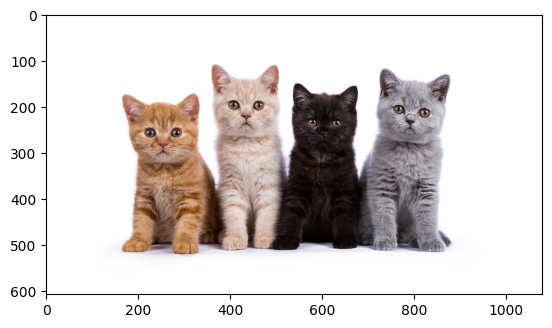

In [5]:
plt.imshow(img, cmap='gray')
plt.imshow(masks[0][2], cmap='jet', alpha=0.5)  # 'jet' colormap and 50% transparency
plt.scatter( input_point[0,0], input_point[0,1], color='red', s=100, marker='x')
plt.scatter( input_point[1,0], input_point[1,1], color='red', s=100, marker='x')

# Show the plot
# plt.axis('off')  # Hide axis
plt.show()

FOR BOX

In [ ]:
bbox = np.array([100, 150, 400, 550])

bbox_masks = predictor.predict(box=bbox, multimask_output=True)

In [ ]:
bbox_masks[0].shape,bbox_masks[1],bbox_masks[2].shape

In [ ]:
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.imshow(bbox_masks[0][0], cmap='jet', alpha=0.5)  # 'jet' colormap and 50% transparency
# ax.scatter( input_point[0,0], input_point[0,1], color='red', s=100, marker='x')
# ax.scatter( input_point[1,0], input_point[1,1], color='red', s=100, marker='x')

# Show the plot
# plt.axis('off')  # Hide axis
x0,y0,x1,y1 = bbox
w = x1 - x0
h = y1 - y0
ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  
plt.show()

In [ ]:
output_mask = mask_generator.generate(img)
output_mask

In [ ]:
output_mask[0]

In [ ]:
sorted_output_mask = sorted(output_mask,key = lambda x: x['predicted_iou'])
for i in sorted_output_mask:
    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray')
    ax.imshow(i['segmentation'], cmap='jet', alpha=0.5)  # 'jet' colormap and 50% transparency
    ax.scatter( int(i['point_coords'][0][0]), int(i['point_coords'][0][1]), color='red', s=100, marker='x')
    x, y, width, height = i['bbox']
    rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)


    # Show the plot
    # plt.axis('off')  # Hide axis
    plt.show()
    print("predicted_iou : ",i['predicted_iou'])
    print("stability_score : ",i['stability_score'])

In [ ]:
output_mask[0]['segmentation'].astype(np.uint8).max()

In [ ]:
sorted_output_mask = sorted(output_mask,key = lambda x: x['predicted_iou'])
combinedmask = functools.reduce(lambda a, b: a + ( b['segmentation'].astype(np.uint8) * ( a.max() + 1)), output_mask, np.zeros_like(output_mask[0]['segmentation'], dtype=np.uint8))
print("np.unique(combinedmask)", np.unique(combinedmask), np.unique(combinedmask).shape)
fig, ax = plt.subplots()
# ax.imshow(img, cmap='gray')
ax.imshow(combinedmask, cmap='jet')  # 'jet' colormap and 50% transparency
# ax.scatter( int(i['point_coords'][0][0]), int(i['point_coords'][0][1]), color='red', s=100, marker='x')
# x, y, width, height = i['bbox']
# rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
# ax.add_patch(rect)


# Show the plot
# plt.axis('off')  # Hide axis
plt.show()
# print("predicted_iou : ",i['predicted_iou'])
# print("stability_score : ",i['stability_score'])

In [ ]:
output_mask[0]['segmentation'].astype(np.uint8)

In [ ]:
np.array([1]) & np.array([1000])